In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import warnings
warnings.filterwarnings('ignore')

import keras
from keras.models import Sequential
from keras.optimizers import RMSprop
from keras.utils import to_categorical
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from keras.utils import np_utils
import keras.backend as K

Using TensorFlow backend.


In [2]:
IMAGE_H = 32
IMAGE_W = 32
CHANNEL = 3
INPUT_SHAPE = (IMAGE_H, IMAGE_W, CHANNEL)

In [3]:
def create_train(path, height, width):
    x_train = []
    y_train = []
    
    for root, folders, files in os.walk(path):
        for f in files:

            filepath = os.path.join(root, f)

            image = cv2.imread(filepath, 1)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image = cv2.resize(image, (height,width))
            x_train.append(image)

            folder = filepath.split('\\')[0]
            folder = folder.split("/")[1]
            y_train.append(folder)    

    x_train = np.array(x_train)
    y_train = np.array(y_train)
    
    return x_train, y_train

def create_test(path, height, width):
    x_test = []
    y_test = []
    
    for root, folders, files in os.walk(path):
        for f in files:

            filepath = os.path.join(root, f)

            image = cv2.imread(filepath, 1)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image = cv2.resize(image, (height,width))
            x_test.append(image)

            folder = filepath.split('\\')[0]
            folder = folder.split("/")[1]
            y_test.append(folder)    

    x_test = np.array(x_test)
    y_test = np.array(y_test)
    
    return x_test, y_test

In [4]:
train_data = 'TRAIN/'
test_data  = 'TEST/'

x_train, y_train = create_train(train_data, IMAGE_H, IMAGE_W)
x_test, y_test = create_test(test_data, IMAGE_H, IMAGE_W)

In [5]:
# Interger Encode
label_encoder = LabelEncoder()
test_integer_encoded = label_encoder.fit_transform(y_test)
train_integer_encoded = label_encoder.fit_transform(y_train)

# Binary Encode
onehot_encoder = OneHotEncoder(sparse=False)
test_integer_encoded = test_integer_encoded.reshape(len(test_integer_encoded), 1)
train_integer_encoded = train_integer_encoded.reshape(len(train_integer_encoded), 1)
    
y_test = onehot_encoder.fit_transform(test_integer_encoded)
y_train = onehot_encoder.fit_transform(train_integer_encoded)

In [6]:
#Inverted One Hot Encode
inverted = label_encoder.inverse_transform([np.argmax(y_train[25])])
print(inverted)

['Blonde Hair']


In [7]:
print("x_train: ", len(x_train), "\ny_train: ", len(y_train))
print("x_test: ", len(x_test), "\ny_test: ", len(y_test))
print()
print("x Train Shape: ", x_train.shape, "\nx Test Shape: ", x_test.shape)
print("y Train: ", y_train.shape, "\ny Test: ", y_test.shape)

x_train:  70 
y_train:  70
x_test:  6 
y_test:  6

x Train Shape:  (70, 32, 32, 3) 
x Test Shape:  (6, 32, 32, 3)
y Train:  (70, 2) 
y Test:  (6, 2)


[1. 0.]


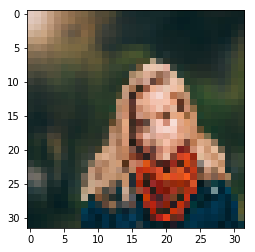

In [8]:
## NO SHUFFLED
plt.imshow(x_test[0])
plt.plot()

print(y_test[0])

In [9]:
from sklearn.utils import shuffle
x_test, y_test = shuffle(x_test, y_test, random_state=0)
x_train, y_train = shuffle(x_train, y_train, random_state=0)

[0. 1.]


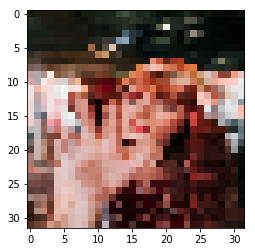

In [10]:
## SHUFFLED
plt.imshow(x_test[0])
plt.plot()

print(y_test[0])

In [11]:
x_test = x_test / 255.0
x_train = x_train / 255.0

In [12]:
def create_cnn():
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3,3), input_shape=INPUT_SHAPE, activation='relu'))
    model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    model.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
    model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
    model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    model.add(Conv2D(1024, kernel_size=(3,3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5)) # regularización Dropout.
    model.add(Dense(2, activation='softmax'))
    
    return model

In [13]:
cnn_model = create_cnn()
cnn_model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['acc', 'mse'])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [14]:
cnn_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 128)       73856     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 10, 10, 256)       295168    
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 8, 8, 512)         1180160   
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 512)         0         
__________

In [15]:
cnn = cnn_model.fit(x_train, y_train, epochs=100, verbose=1, validation_data=(x_test, y_test), shuffle=False)

Instructions for updating:
Use tf.cast instead.
Train on 70 samples, validate on 6 samples
Epoch 1/100
70/70 [==============================] - 4s 54ms/step - loss: 0.6963 - acc: 0.5000 - mean_squared_error: 0.2516 - val_loss: 0.6925 - val_acc: 0.5000 - val_mean_squared_error: 0.2497
Epoch 2/100
70/70 [==============================] - 0s 2ms/step - loss: 0.6929 - acc: 0.5000 - mean_squared_error: 0.2499 - val_loss: 0.6924 - val_acc: 0.5000 - val_mean_squared_error: 0.2496
Epoch 3/100
70/70 [==============================] - 0s 2ms/step - loss: 0.6896 - acc: 0.5000 - mean_squared_error: 0.2482 - val_loss: 0.6925 - val_acc: 0.5000 - val_mean_squared_error: 0.2497
Epoch 4/100
70/70 [==============================] - 0s 1ms/step - loss: 0.6950 - acc: 0.5000 - mean_squared_error: 0.2509 - val_loss: 0.6923 - val_acc: 0.5000 - val_mean_squared_error: 0.2496
Epoch 5/100
70/70 [==============================] - 0s 1ms/step - loss: 0.6918 - acc: 0.4857 - mean_squared_error: 0.2493 - val_loss: 0

Epoch 42/100
70/70 [==============================] - 0s 1ms/step - loss: 0.6543 - acc: 0.6429 - mean_squared_error: 0.2307 - val_loss: 0.6980 - val_acc: 0.5000 - val_mean_squared_error: 0.2524
Epoch 43/100
70/70 [==============================] - 0s 2ms/step - loss: 0.6512 - acc: 0.6714 - mean_squared_error: 0.2292 - val_loss: 0.6983 - val_acc: 0.5000 - val_mean_squared_error: 0.2526
Epoch 44/100
70/70 [==============================] - 0s 1ms/step - loss: 0.6458 - acc: 0.6286 - mean_squared_error: 0.2266 - val_loss: 0.6984 - val_acc: 0.5000 - val_mean_squared_error: 0.2526
Epoch 45/100
70/70 [==============================] - 0s 2ms/step - loss: 0.6490 - acc: 0.6429 - mean_squared_error: 0.2282 - val_loss: 0.6988 - val_acc: 0.5000 - val_mean_squared_error: 0.2528
Epoch 46/100
70/70 [==============================] - 0s 1ms/step - loss: 0.6414 - acc: 0.6429 - mean_squared_error: 0.2244 - val_loss: 0.6982 - val_acc: 0.5000 - val_mean_squared_error: 0.2525
Epoch 47/100
70/70 [==========

70/70 [==============================] - 0s 1ms/step - loss: 0.4129 - acc: 0.8143 - mean_squared_error: 0.1383 - val_loss: 0.7873 - val_acc: 0.5000 - val_mean_squared_error: 0.2962
Epoch 85/100
70/70 [==============================] - 0s 2ms/step - loss: 0.2698 - acc: 0.9429 - mean_squared_error: 0.0688 - val_loss: 0.9274 - val_acc: 0.5000 - val_mean_squared_error: 0.3397
Epoch 86/100
70/70 [==============================] - 0s 2ms/step - loss: 0.3363 - acc: 0.8286 - mean_squared_error: 0.1084 - val_loss: 0.9359 - val_acc: 0.6667 - val_mean_squared_error: 0.3247
Epoch 87/100
70/70 [==============================] - 0s 1ms/step - loss: 0.5792 - acc: 0.7143 - mean_squared_error: 0.1976 - val_loss: 1.0777 - val_acc: 0.5000 - val_mean_squared_error: 0.3812
Epoch 88/100
70/70 [==============================] - 0s 2ms/step - loss: 0.6411 - acc: 0.5429 - mean_squared_error: 0.2338 - val_loss: 0.7338 - val_acc: 0.5000 - val_mean_squared_error: 0.2713
Epoch 89/100
70/70 [=======================

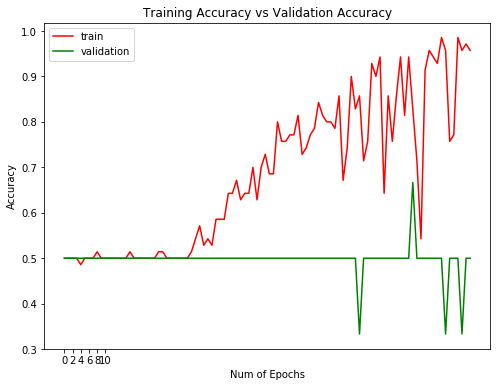

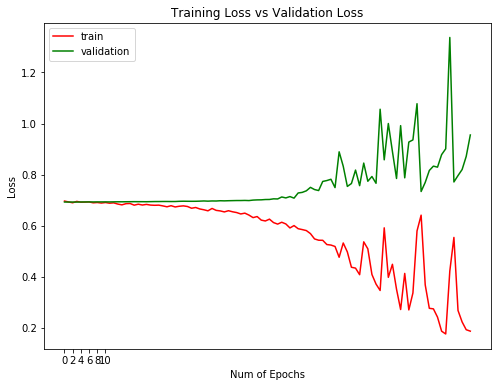

In [17]:
plt.figure(0)  
plt.plot(cnn.history['acc'],'r')  
plt.plot(cnn.history['val_acc'],'g')  
plt.xticks(np.arange(0, 11, 2.0))  
plt.rcParams['figure.figsize'] = (8, 6)  
plt.xlabel("Num of Epochs")  
plt.ylabel("Accuracy")  
plt.title("Training Accuracy vs Validation Accuracy")  
plt.legend(['train','validation'])

plt.figure(1)  
plt.plot(cnn.history['loss'],'r')  
plt.plot(cnn.history['val_loss'],'g')  
plt.xticks(np.arange(0, 11, 2.0))  
plt.rcParams['figure.figsize'] = (8, 6)  
plt.xlabel("Num of Epochs")  
plt.ylabel("Loss")  
plt.title("Training Loss vs Validation Loss")  
plt.legend(['train','validation'])

plt.show() 